In [1]:
import cdsapi
import getpass
import matplotlib.pyplot as plt
import xarray as xr

from azure.storage.blob import BlockBlobService
from calendar import monthrange
from glob import glob
from tqdm import tqdm

In [3]:
key = getpass.getpass()

········


In [2]:
llon = 4.5
ulon = 32
llat = 53.5
ulat = 71.5

In [5]:
blob_storage = BlockBlobService(account_name="ccclimatedata", account_key=key)
blob_storage_container_name = "era5-nordics-solarradiation"

In [10]:
for year in range(2012, 2019):
    for month in range(1, 13):
        days = range(1, monthrange(year, month)[1] + 1)

        request = {
                'variable':[
                    'surface_solar_radiation_downwards'
                ],
                'product_type':'reanalysis',
                'year': "%04d" % year,
                'month': "%02d" % month ,
                'day': ["%02d" % d for d in range(1, 32)],
                'time': ["%02d:00" % h for h in range(0, 24)],
                'area': [
                    ulat, llon, llat, ulon # North, West, South, East
                ],
                'format':'netcdf'
            }

        c = cdsapi.Client()

        r = c.retrieve(
            'reanalysis-era5-single-levels',
            request
            )

        file_path = "era5-nordics-solarradiation-%04d-%02d.nc" % (year, month)

        r.download(file_path)

        #blob_storage.create_blob_from_path(
        #container_name=blob_storage_container_name,
        #file_path=file_path,
        #blob_name=file_path,
        #timeout = 180)

2018-11-20 13:25:55,391 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2018-11-20 13:25:59,823 INFO Request is queued
2018-11-20 13:26:01,154 INFO Request is running
2018-11-20 13:27:17,217 INFO Request is completed
2018-11-20 13:27:18,374 INFO Downloading http://136.156.132.110/cache-compute-0004/cache/data2/adaptor.mars.internal-1542727559.7742138-21005-1-b6f75627-0cf1-4b8d-9d80-3897fc920e5e.nc to era5-nordics-solarradiation-2012-01.nc (11.5M)
2018-11-20 13:27:30,730 INFO Download rate 953.5K/s
2018-11-20 13:27:30,734 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2018-11-20 13:27:31,983 INFO Request is queued
2018-11-20 13:27:33,317 INFO Request is running
2018-11-20 13:28:23,598 INFO Request is completed
2018-11-20 13:28:24,819 INFO Downloading http://136.156.132.110/cache-compute-0004/cache/data1/adaptor.mars.internal-1542727653.5023954-20430-12-7c1d5d7d-3752-4097-bb

2018-11-20 13:45:22,560 INFO Download rate 840K/s
2018-11-20 13:45:22,562 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2018-11-20 13:45:24,000 INFO Request is queued
2018-11-20 13:45:25,239 INFO Request is running


ReadTimeout: HTTPSConnectionPool(host='cds.climate.copernicus.eu', port=443): Read timed out. (read timeout=None)

In [1]:
!ncdump -h era5-nordics-solarradiation-2000-01.nc

netcdf era5-nordics-solarradiation-2000-01 {
dimensions:
	longitude = 111 ;
	latitude = 73 ;
	time = 744 ;
variables:
	float longitude(longitude) ;
		longitude:units = "degrees_east" ;
		longitude:long_name = "longitude" ;
	float latitude(latitude) ;
		latitude:units = "degrees_north" ;
		latitude:long_name = "latitude" ;
	int time(time) ;
		time:units = "hours since 1900-01-01 00:00:0.0" ;
		time:long_name = "time" ;
		time:calendar = "gregorian" ;
	short ssrd(time, latitude, longitude) ;
		ssrd:scale_factor = 16.1521065722613 ;
		ssrd:add_offset = 529239.923946714 ;
		ssrd:_FillValue = -32767s ;
		ssrd:missing_value = -32767s ;
		ssrd:units = "J m**-2" ;
		ssrd:long_name = "Surface solar radiation downwards" ;
		ssrd:standard_name = "surface_downwelling_shortwave_flux_in_air" ;

// global attributes:
		:Conventions = "CF-1.6" ;
		:history = "2018-11-19 13:59:50 GMT by grib_to_netcdf-2.7.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf -o /cache/data2/adaptor.mars.internal-1542635937.5732863-

In [2]:
files = sorted(glob("era5-nordics-solarradiation-200*-*.nc"))

In [3]:
ds = xr.open_mfdataset(files)

In [4]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 73, longitude: 111, time: 87672)
Coordinates:
  * longitude  (longitude) float32 4.5 4.75 5.0 5.25 5.5 5.75 6.0 6.25 6.5 ...
  * latitude   (latitude) float32 71.5 71.25 71.0 70.75 70.5 70.25 70.0 ...
  * time       (time) datetime64[ns] 2000-01-01 2000-01-01T01:00:00 ...
Data variables:
    ssrd       (time, latitude, longitude) float32 dask.array<shape=(87672, 73, 111), chunksize=(744, 73, 111)>
Attributes:
    Conventions:  CF-1.6
    history:      2018-11-19 13:59:50 GMT by grib_to_netcdf-2.7.0: /opt/ecmwf...

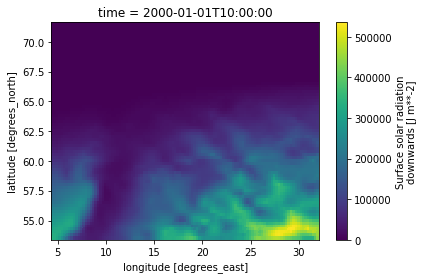

In [5]:
ds["ssrd"][10,:,:].plot.pcolormesh()

In [6]:
da_ssrd = ds["ssrd"].where(ds["ssrd"] > 0)

In [7]:
da_ssrd = (da_ssrd * 16.1521065722613 + 529239.923946714) / 3600.

In [8]:
da_ssrd[14].values

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [2148.9836 , 2128.6199 , 2108.8357 , ...,  271.6588 ,  260.42593,
         250.93251],
       [2210.728  , 2190.364  , 2170.     , ...,  283.68878,  270.7891 ,
         264.19434],
       [2274.5012 , 2252.9775 , 2232.2515 , ...,  265.2814 ,  262.16525,
         259.26642]], dtype=float32)

In [9]:
da_ssrd_monthly = da_ssrd.groupby("time.month").mean("time")

In [10]:
da_ssrd_monthly

<xarray.DataArray 'ssrd' (month: 12, latitude: 73, longitude: 111)>
dask.array<shape=(12, 73, 111), dtype=float32, chunksize=(1, 73, 111)>
Coordinates:
  * longitude  (longitude) float32 4.5 4.75 5.0 5.25 5.5 5.75 6.0 6.25 6.5 ...
  * latitude   (latitude) float32 71.5 71.25 71.0 70.75 70.5 70.25 70.0 ...
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

100%|██████████| 4/4 [00:35<00:00,  8.95s/it]


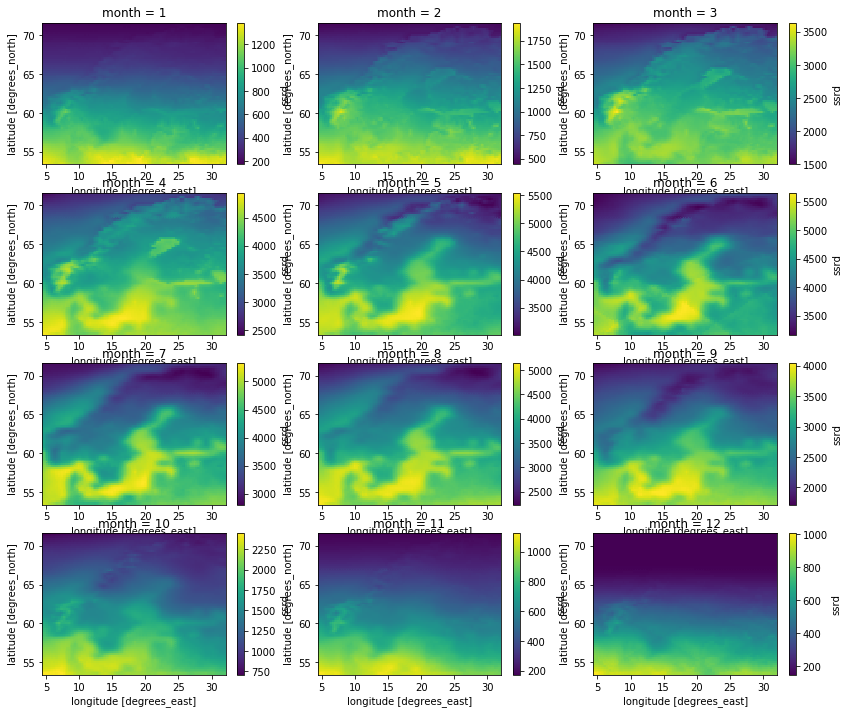

In [11]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14,12))
for i in tqdm(range(0, 4)):
    for j in range(0, 3):
        month = ((i * 3) + j) + 1
        da_ssrd_monthly.sel(month=month).plot.pcolormesh(ax=axes[i,j])

In [12]:
da_ssrd_monthly.to_netcdf("era5-nordics-solarradiation-monthly.nc")

In [13]:
!ncdump -h era5-nordics-solarradiation-monthly.nc

netcdf era5-nordics-solarradiation-monthly {
dimensions:
	longitude = 111 ;
	latitude = 73 ;
	month = 12 ;
variables:
	float longitude(longitude) ;
		longitude:_FillValue = NaNf ;
		longitude:units = "degrees_east" ;
		longitude:long_name = "longitude" ;
	float latitude(latitude) ;
		latitude:_FillValue = NaNf ;
		latitude:units = "degrees_north" ;
		latitude:long_name = "latitude" ;
	int64 month(month) ;
	float ssrd(month, latitude, longitude) ;
		ssrd:_FillValue = NaNf ;
}
